In [1]:
import sys
!pip install pandas_profiling
!pip install wordcloud
!pip3 install wordcloud

In [2]:
# Basic Libraries
import pandas as pd #data processing
import numpy as np #linear_algebra
import matplotlib.pyplot as plt #visual
import seaborn as sb #visual
import warnings
warnings.filterwarnings('ignore')

#Handling text, making use of natural language toolkit
import nltk
import re
nltk.download('punkt')
sb.set()
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#machine learning preprocessing & classification models
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score,accuracy_score,classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


#test
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package punkt to /Users/shaneyy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Exploratory Data Analysis (EDA)

In [3]:
FakejobData = pd.read_csv('fake_job_postings.csv')
FakejobData.head()

job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   
3  THE COMPANY: ESRI – Environmental Systems Rese...   
4  JOB TITLE: Itemization Review ManagerLOCATION:...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   
2  Implement pre-commissioning and commissioning ...   
3  EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4  QUALIFICATIONS:RN license in the State of Texa...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...              0   
2                                                NaN              0   
3  Our culture is anything but corporate—we have ...              0   
4                              Full Benefits Offered              0   

   has_company_logo  has_questions employment_type required_experience  \
0                 1              0           Other          Internship   
1                 1              0       Full-time      Not Applicable   
2                 1              0             NaN                 NaN   
3                 1              0       Full-time    Mid-Senior level   
4                 1              1       Full-time    Mid-Senior level   

  required_education                   industry              function  \
0                NaN                        NaN             Marketing   
1                NaN  Marketing and Advertising      Customer Service   
2                NaN                        NaN                   NaN   
3  Bachelor's Degree          Computer Software                 Sales   
4  Bachelor's Degree     Hospital & Health Care  Health Care Provider   

   fraudulent  
0           0  
1           0  
2           0  
3           0  
4           0

In [4]:
# Numeric representation of fraudulent to non-fradulent job lisitng
countNo, countYes = FakejobData['fraudulent'].value_counts()
print("Ratio of classes is NotFraud : Fraud = ", countNo, ":", countYes)

Ratio of classes is NotFraud : Fraud =  17014 : 866


count
fraudulent       
0           17014
1             866

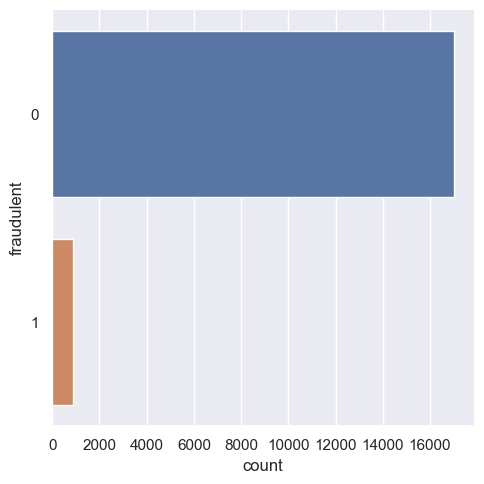

In [5]:
# Bar plot representation of fraudulent to non-fraudulent job listing
sb.catplot(y = 'fraudulent', data = FakejobData, kind = "count")
FakejobData['fraudulent'].value_counts().to_frame()

In [6]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [7]:
FakejobData[['telecommuting','has_company_logo','has_questions']].describe()

telecommuting  has_company_logo  has_questions
count   17880.000000      17880.000000   17880.000000
mean        0.042897          0.795302       0.491723
std         0.202631          0.403492       0.499945
min         0.000000          0.000000       0.000000
25%         0.000000          1.000000       0.000000
50%         0.000000          1.000000       0.000000
75%         0.000000          1.000000       1.000000
max         1.000000          1.000000       1.000000

these data are in fact not integer data type but a boolean data type


In [8]:
categories=['telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','fraudulent']

In [9]:
#listing out the all the types of categories within the dataset

for i in categories:
     x=FakejobData[i].value_counts()
     print (x.to_frame())
    


               count
telecommuting       
0              17113
1                767
                  count
has_company_logo       
1                 14220
0                  3660
               count
has_questions       
0               9088
1               8792
                 count
employment_type       
Full-time        11620
Contract          1524
Part-time          797
Temporary          241
Other              227
                     count
required_experience       
Mid-Senior level      3809
Entry level           2697
Associate             2297
Not Applicable        1116
Director               389
Internship             381
Executive              141
                                   count
required_education                      
Bachelor's Degree                   5145
High School or equivalent           2080
Unspecified                         1397
Master's Degree                      416
Associate Degree                     274
Certification                        170
Some

In [10]:
# To view which categories has missing values
FakejobData.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

(array([5.00000e-01, 1.48500e+02, 2.96500e+02, 4.44500e+02, 5.92500e+02,
        7.40500e+02, 8.88500e+02, 1.03650e+03, 1.18450e+03, 1.33250e+03,
        1.48050e+03, 1.62850e+03, 1.77650e+03, 1.92450e+03, 2.07250e+03,
        2.22050e+03, 2.36850e+03, 2.51650e+03, 2.66450e+03, 2.81250e+03,
        2.96050e+03, 3.10850e+03, 3.25650e+03, 3.40450e+03, 3.55250e+03,
        3.70050e+03, 3.84850e+03, 3.99650e+03, 4.14450e+03, 4.29250e+03,
        4.44050e+03, 4.58850e+03, 4.73650e+03, 4.88450e+03, 5.03250e+03,
        5.18050e+03, 5.32850e+03, 5.47650e+03, 5.62450e+03, 5.77250e+03,
        5.92050e+03, 6.06850e+03, 6.21650e+03, 6.36450e+03, 6.51250e+03,
        6.66050e+03, 6.80850e+03, 6.95650e+03, 7.10450e+03, 7.25250e+03,
        7.40050e+03, 7.54850e+03, 7.69650e+03, 7.84450e+03, 7.99250e+03,
        8.14050e+03, 8.28850e+03, 8.43650e+03, 8.58450e+03, 8.73250e+03,
        8.88050e+03, 9.02850e+03, 9.17650e+03, 9.32450e+03, 9.47250e+03,
        9.62050e+03, 9.76850e+03, 9.91650e+03, 1.00

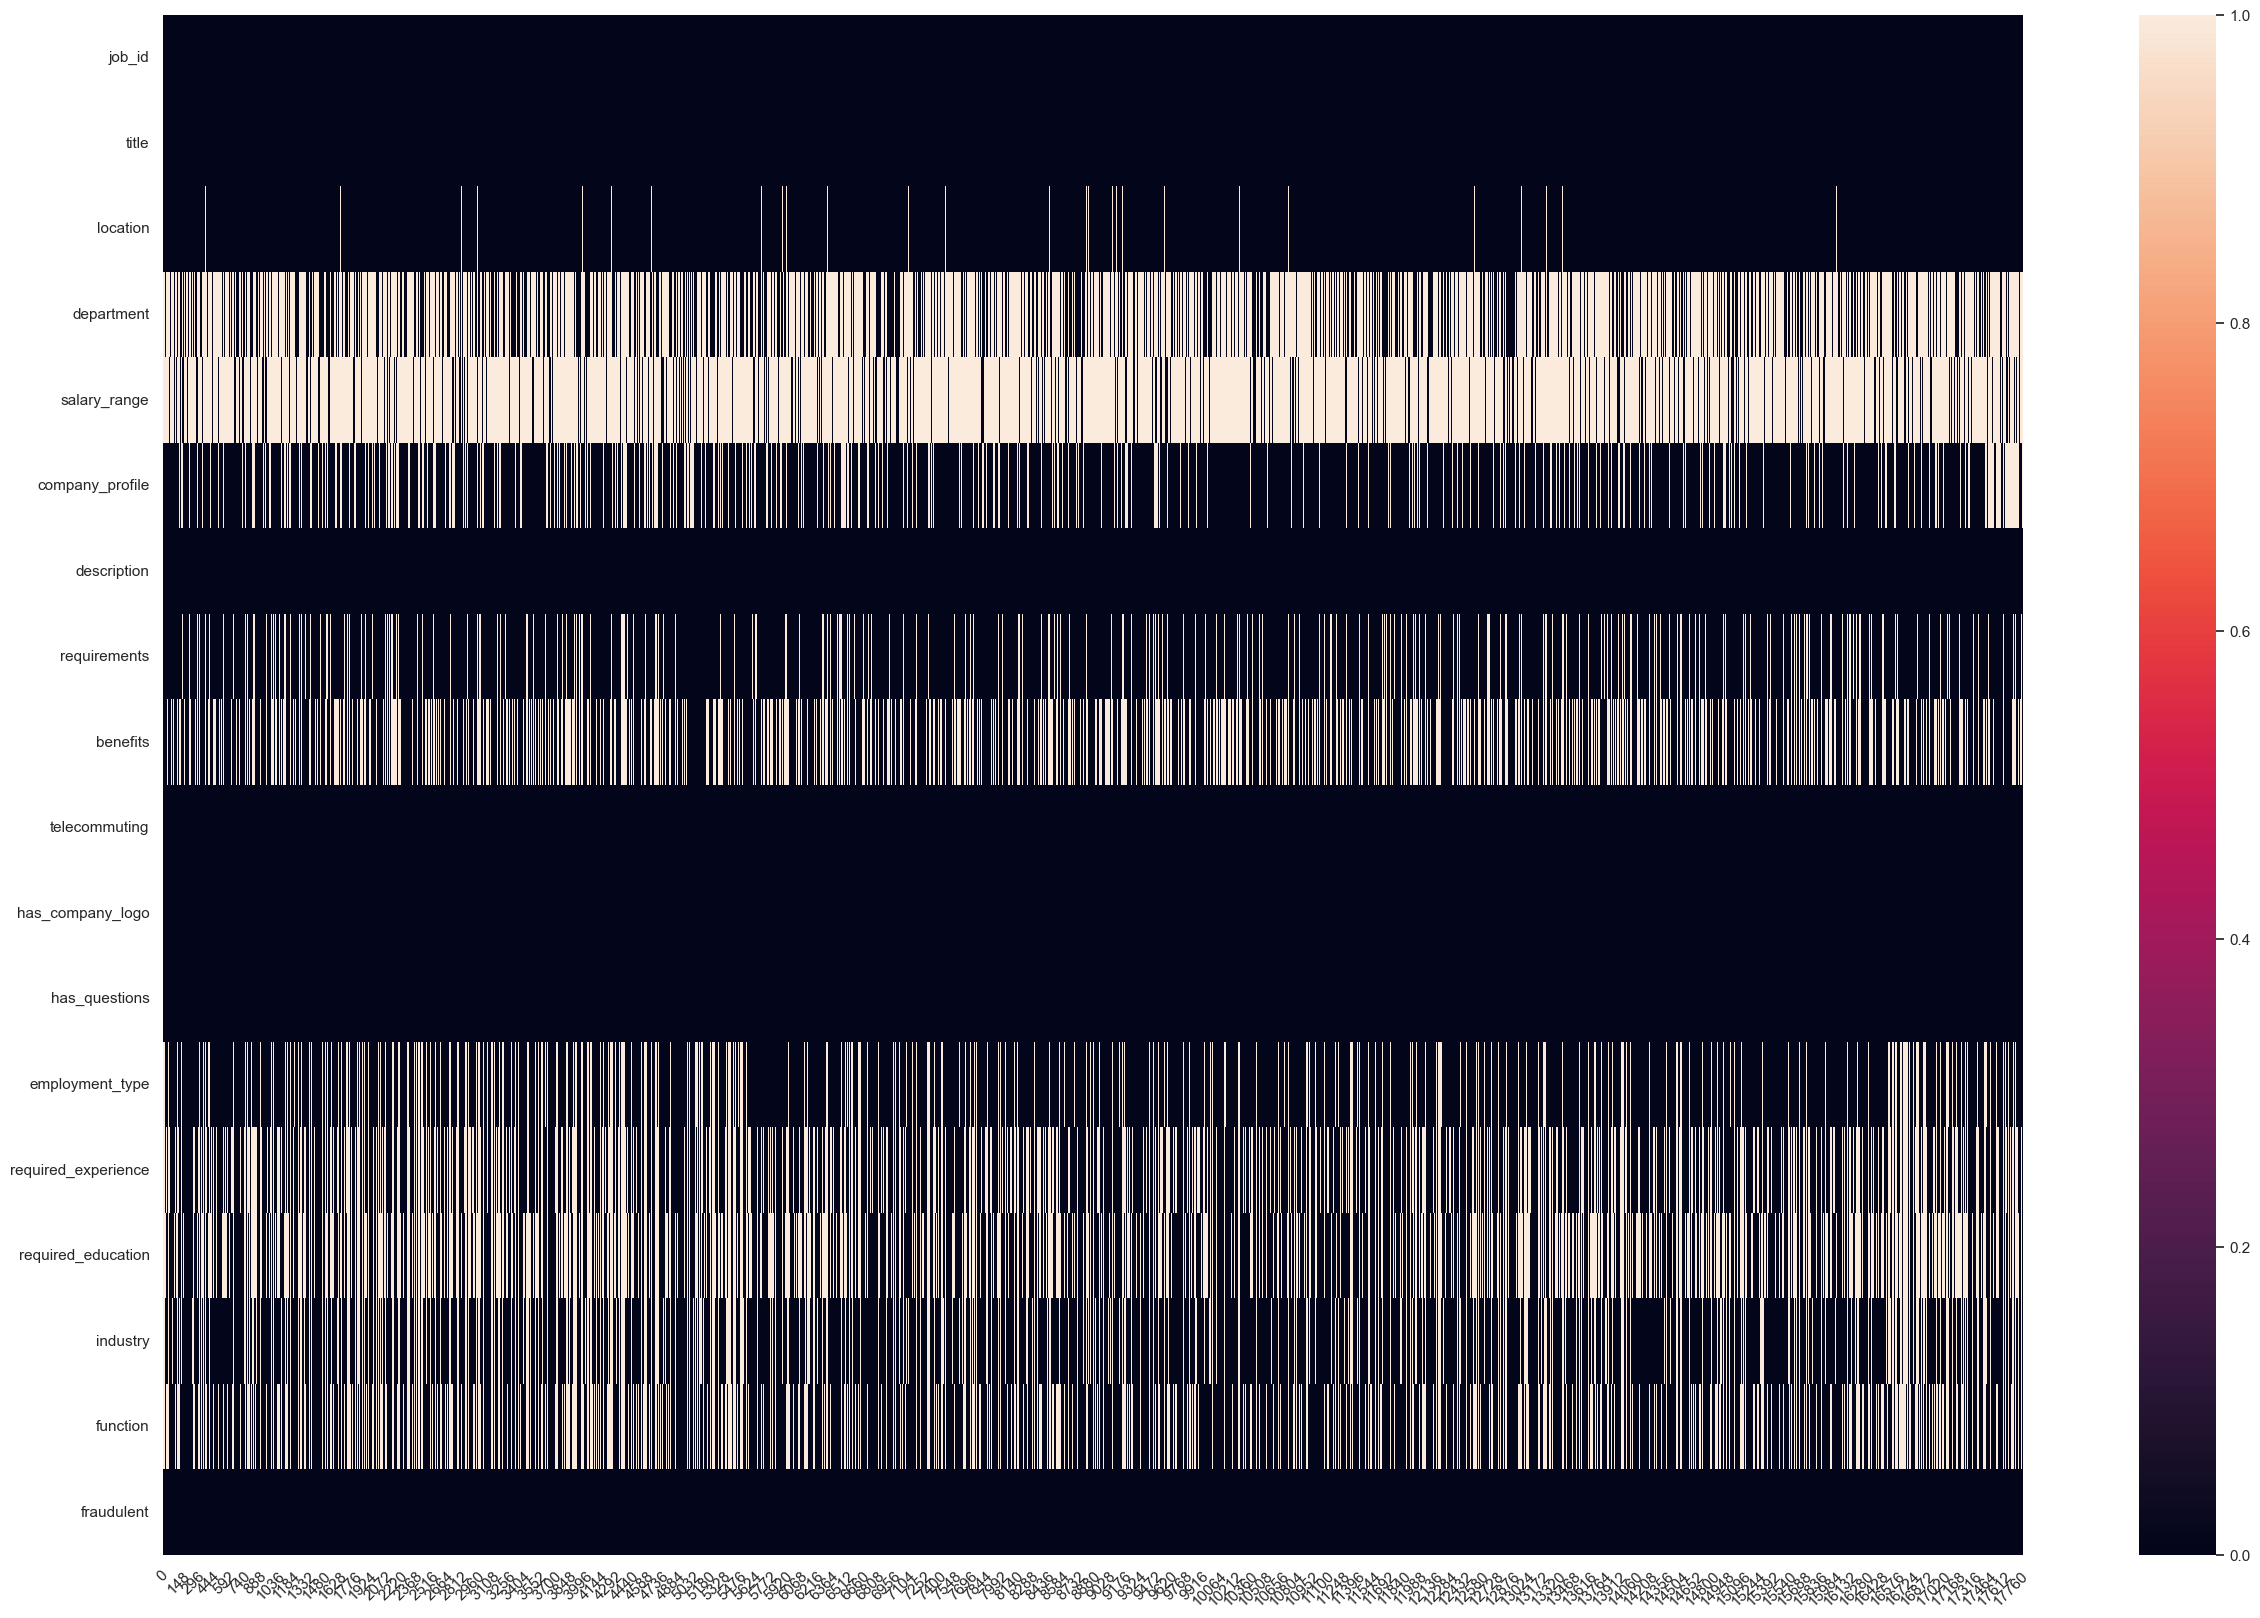

In [11]:
plt.figure(figsize=(30,20))
sb.heatmap(FakejobData.isna().transpose())
plt.xticks(rotation=45)

In [12]:
#Removing undesired columns & nan 
FakejobData.function.fillna(FakejobData.department,inplace=True)
FakejobData.drop(columns=['job_id','salary_range','department'],inplace=True)

In [13]:
#Now we need to handle missing values for text data and categorical data

text=['title','benefits','company_profile','location','description','requirements','fraudulent']

categ=['employment_type','required_experience','required_education','industry','function','telecommuting','has_company_logo','has_questions','fraudulent']

In [14]:
#filling nan in categorical data
categ_cols=FakejobData[categ].fillna('None')
categ_cols

employment_type required_experience required_education  \
0               Other          Internship               None   
1           Full-time      Not Applicable               None   
2                None                None               None   
3           Full-time    Mid-Senior level  Bachelor's Degree   
4           Full-time    Mid-Senior level  Bachelor's Degree   
...               ...                 ...                ...   
17875       Full-time    Mid-Senior level               None   
17876       Full-time    Mid-Senior level  Bachelor's Degree   
17877       Full-time                None               None   
17878        Contract      Not Applicable       Professional   
17879       Full-time    Mid-Senior level               None   

                        industry              function  telecommuting  \
0                           None             Marketing              0   
1      Marketing and Advertising      Customer Service              0   
2                           None                  None              0   
3              Computer Software                 Sales              0   
4         Hospital & Health Care  Health Care Provider              0   
...                          ...                   ...            ...   
17875          Computer Software                 Sales              0   
17876                   Internet   Accounting/Auditing              0   
17877                       None                  None              0   
17878             Graphic Design                Design              0   
17879          Computer Software           Engineering              0   

       has_company_logo  has_questions  fraudulent  
0                     1              0           0  
1                     1              0           0  
2                     1              0           0  
3                     1              0           0  
4                     1              1           0  
...                 ...            ...         ...  
17875                 1              1           0  
17876                 1              1           0  
17877                 0              0           0  
17878                 0              1           0  
17879                 1              1           0  

[17880 rows x 9 columns]

In [15]:
#filling nan in text data
txt_cols=FakejobData[text].fillna(' ')
txt_cols

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                                                benefits  \
0                                                          
1      What you will get from usThrough being part of...   
2                                                          
3      Our culture is anything but corporate—we have ...   
4                                  Full Benefits Offered   
...                                                  ...   
17875  What can you expect from us?We have an open cu...   
17876  Health &amp; WellnessMedical planPrescription ...   
17877                                                      
17878  Competitive salary (compensation will be based...   
17879                                                      

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                                      
17879  Vend is looking for some awesome new talent to...   

                   location  \
0          US, NY, New York   
1            NZ, , Auckland   
2             US, IA, Wever   
3        US, DC, Washington   
4        US, FL, Fort Worth   
...                     ...   
17875       CA, ON, Toronto   
17876  US, PA, Philadelphia   
17877       US, TX, Houston   
17878         NG, LA, Lagos   
17879     NZ, N, Wellington   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  fraudulent  
0      Experience with content management systems a m...           0  
1      What we expect from you:Your key responsibilit...           0  
2      Implement pre-commissioning and commissioning ...           0  
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...           0  
4      QUALIFICATIONS:RN license in the State of Texa...           0  
...                                                  ...         ...  
17875  To ace this role you:Will eat comprehensive St...           0  
17876  - B.A. or B.S. in Accounting- Desire to have f...           0  
17877  At least 12 years professional experience.Abil...           0  
17878  1. Must be fluent in the latest versions of Co...           0  
17879  We wan

# Getting country names from location¶

we found that we have 91 Countries

In [16]:
categ_cols['country']=txt_cols['location'].apply(lambda x:x.split(',')[0])
countries=categ_cols['country'].value_counts().to_frame()
countries

count
country       
US       10656
GB        2384
GR         940
CA         457
DE         383
...        ...
SI           1
CO           1
SD           1
UG           1
KH           1

[91 rows x 1 columns]

In [17]:
#Seperate the real and fraudulent job listings
fakejobs=categ_cols[categ_cols['fraudulent']==1]
realjobs=categ_cols[categ_cols['fraudulent']==0]

In [18]:
categorical=[]
numerical=[]

for col in FakejobData.columns:
    if FakejobData[col].dtypes !='object':
            numerical.append(col)
    else:
        categorical.append(col)

<Axes: >

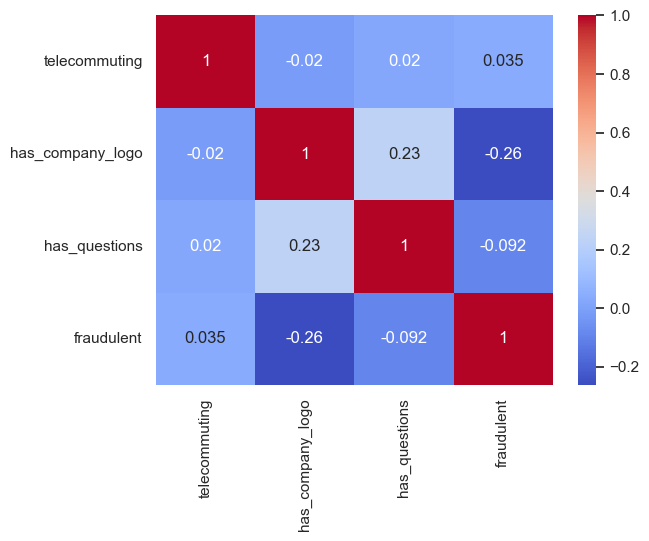

In [117]:
sb.heatmap(FakejobData[numerical].corr(), cmap='coolwarm', annot=True)

In [20]:

FakejobData['country'] = FakejobData['location'].str.split(',').str[0]

Text(0, 0.5, 'No. of Jobs')

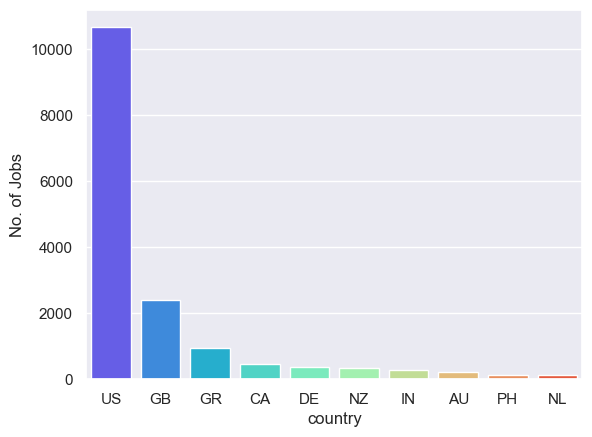

In [21]:
country = FakejobData['country'].value_counts().nlargest(10).index.tolist()
ax=sb.countplot(data=FakejobData, x='country', order=country, palette='rainbow')
ax.set_ylabel('No. of Jobs')

# Data Cleaning and NLP¶

In this section, the data will be cleaned to remove unnecessary information for NLP. Specifically, the text will be converted into its base form, with special chars, links, and other meaningless information removed, so that the text can be effectively used for the ML models in the following sections.

In [22]:
# As we used Country in location column as a category data
cols_to_remove=['location']
txt_cols.drop(columns=cols_to_remove,inplace=True) 

In [23]:
#Cleaning Text & Removing Stopwords and Stemming

stemmer=PorterStemmer()
stop=set(stopwords.words('english'))

In [24]:
def column_clean(text):
    text = text.lower()
    text = re.sub('[^a-zA-Z\s*]','',text)
    text=text.split()
    text=[stemmer.stem(word) for word in text if word not in set(stopwords.words('english'))]
    return (text)

In [25]:
# Splitting Text Data to Fraud or Not Fraud
txt_fraud=txt_cols[txt_cols['fraudulent']==1]
txt_not_fraud=txt_cols[txt_cols['fraudulent']==0]

In [26]:
#Apply cleaning to the title

txt_fraud['title']=txt_fraud['title'].apply(column_clean)
txt_not_fraud['title']=txt_not_fraud['title'].apply(column_clean)

In [27]:
def combine(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

fraud_titles = txt_fraud['title'].apply(combine)
not_fraud_titles = txt_not_fraud['title'].apply(combine)

In [28]:
fraud_titles

98                      ice technician
144                        forward cap
173      technician instrument control
180                        sale execut
215             ice technician mt poso
                     ...              
17827    student posit parttim fulltim
17828                      sale associ
17829                  android develop
17830                     payrol clerk
17831                   furnitur mover
Name: title, Length: 866, dtype: object

In [29]:
# To List

fraud_titles_corpus=fraud_titles.values.tolist()
not_fraud_titles_corpus=not_fraud_titles.values.tolist()

In [30]:
# Corpus for WordCloud
fraud_titles_corpus=' '.join(fraud_titles_corpus)
not_fraud_titles_corpus=' '.join(not_fraud_titles_corpus)

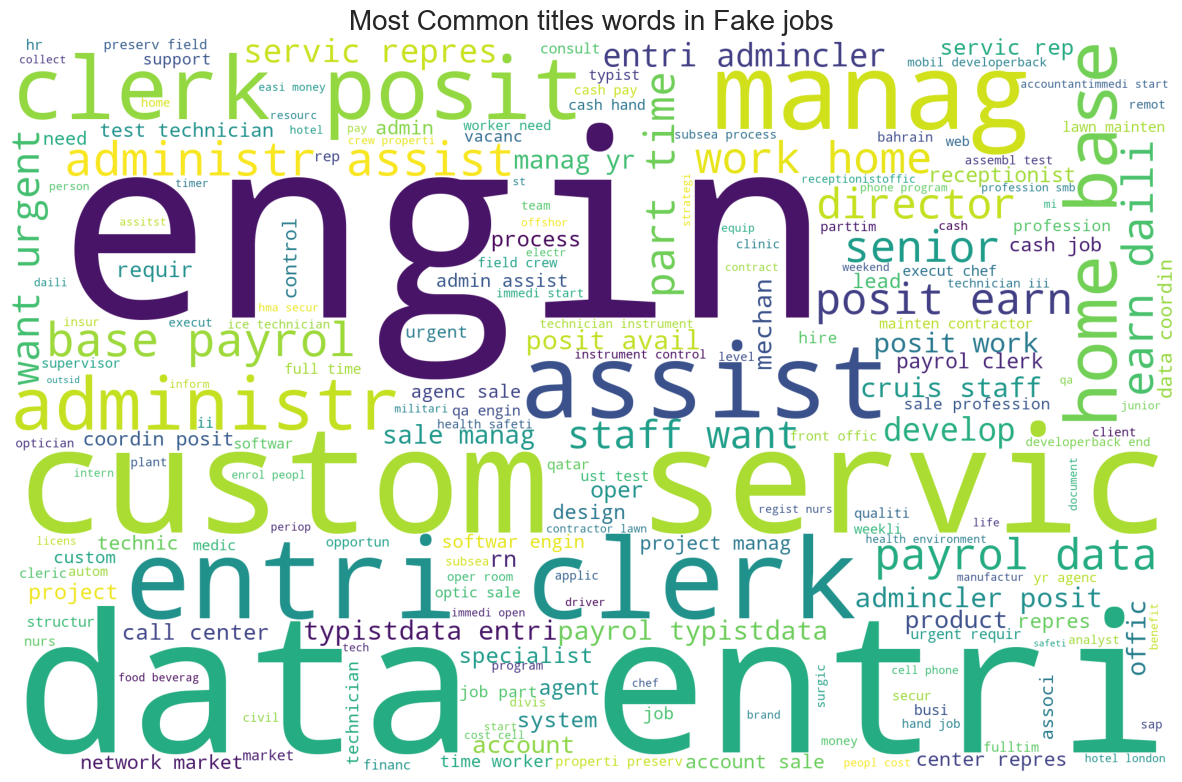

In [31]:
#Most Common Titles for Fake & Real Jobs

plt.figure(figsize=(15,10))
wordcloudfraud=WordCloud(width = 1900 , height = 1200 , background_color='white').generate(fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Fake jobs',size=20)
plt.imshow(wordcloudfraud)

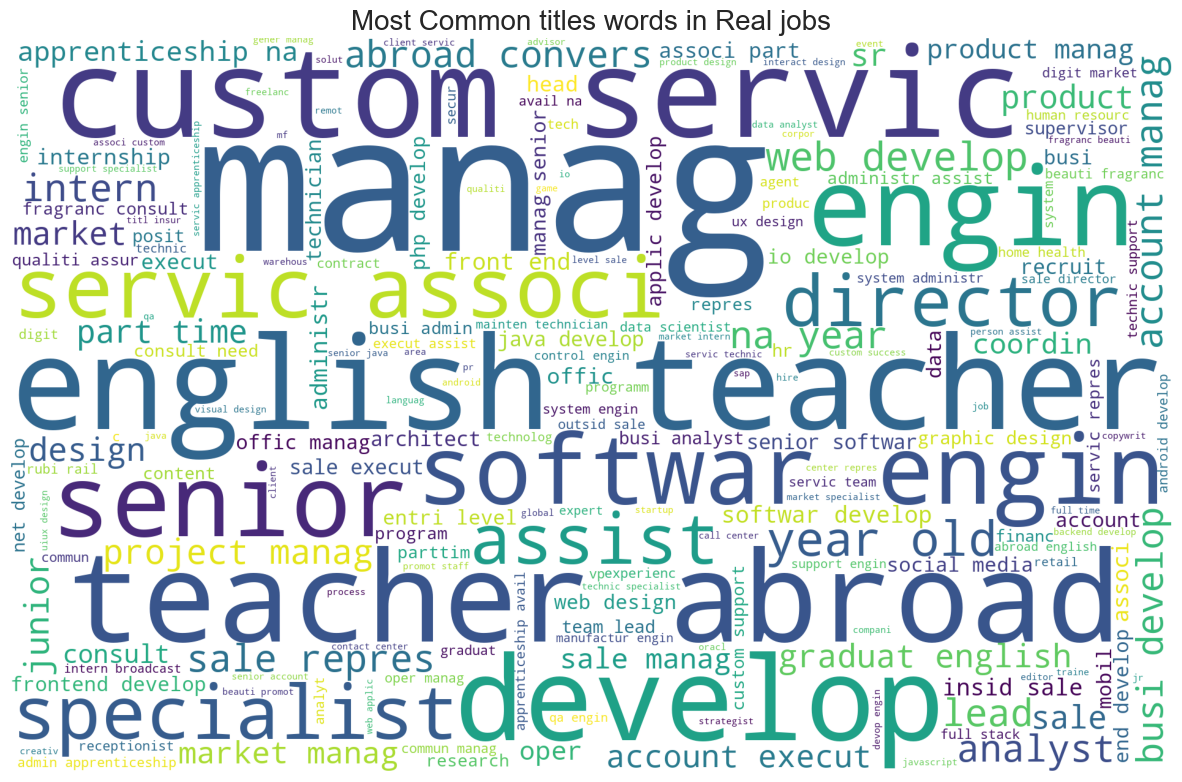

In [32]:
plt.figure(figsize=(15,10))
wordcloudnotfraud=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_titles_corpus)
plt.axis('off')
plt.title('Most Common titles words in Real jobs',size=20)
plt.imshow(wordcloudnotfraud)

Text(0.5, 1.0, 'Real Titles Lengths')

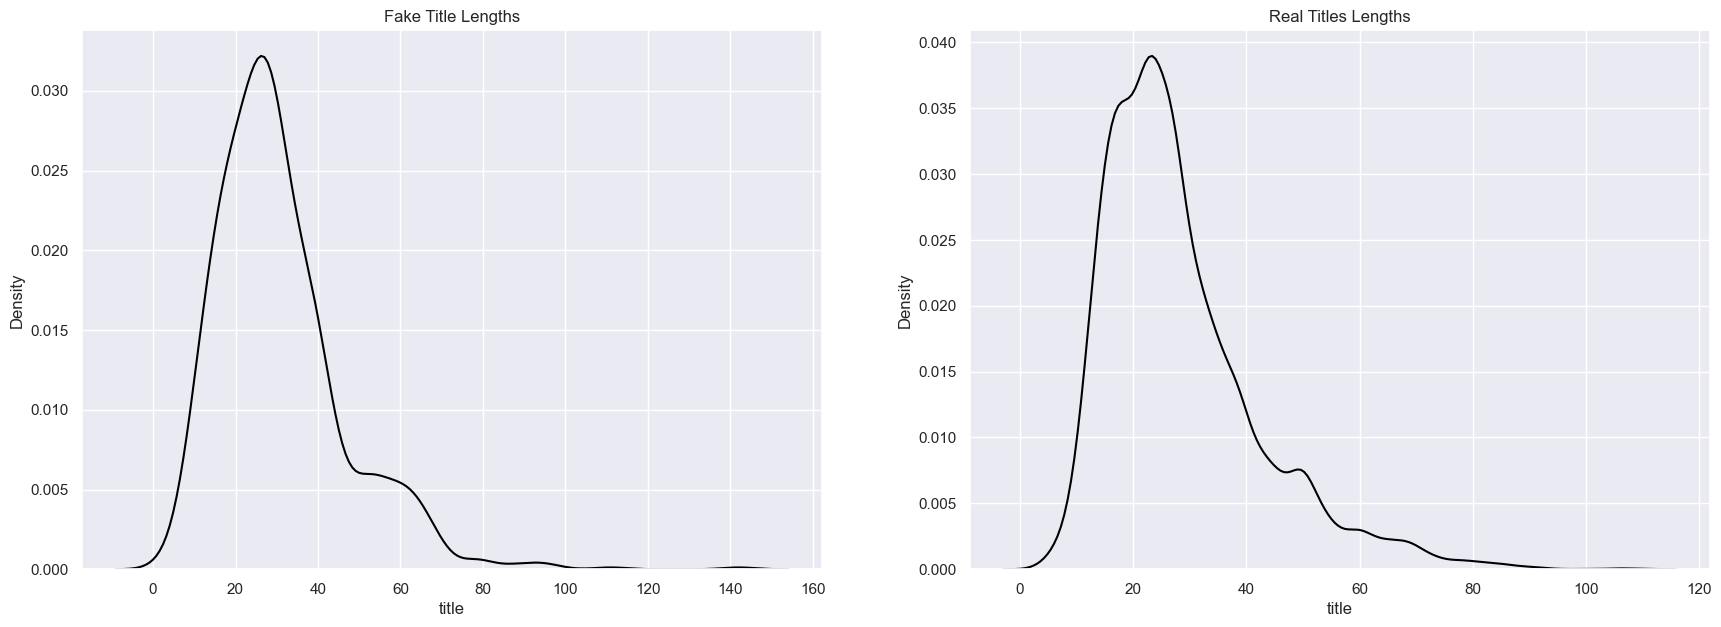

In [33]:
fraud_title_length=txt_cols[txt_cols["fraudulent"]==1]['title'].str.len()
not_fraud_title_length=txt_cols[txt_cols["fraudulent"]==0]['title'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sb.kdeplot(fraud_title_length,ax=axes[0],color='black') 
sb.kdeplot(not_fraud_title_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Title Lengths',fontsize=12)
axes[1].set_title('Real Titles Lengths',fontsize=12)

In [34]:
txt_fraud['benefits']=txt_fraud['benefits'].apply(column_clean)
txt_not_fraud['benefits']=txt_not_fraud['benefits'].apply(column_clean)

In [35]:
fraud_benefits = txt_fraud['benefits'].apply(combine)
not_fraud_benefits = txt_not_fraud['benefits'].apply(combine)

In [36]:
# To List

fraud_benefits_corpus=fraud_benefits.values.tolist()
not_fraud_benefits_corpus=not_fraud_benefits.values.tolist()

In [37]:
# Corpus for WordCloud
fraud_benefits_corpus=' '.join(fraud_benefits_corpus)
not_fraud_benefits_corpus=' '.join(not_fraud_benefits_corpus)

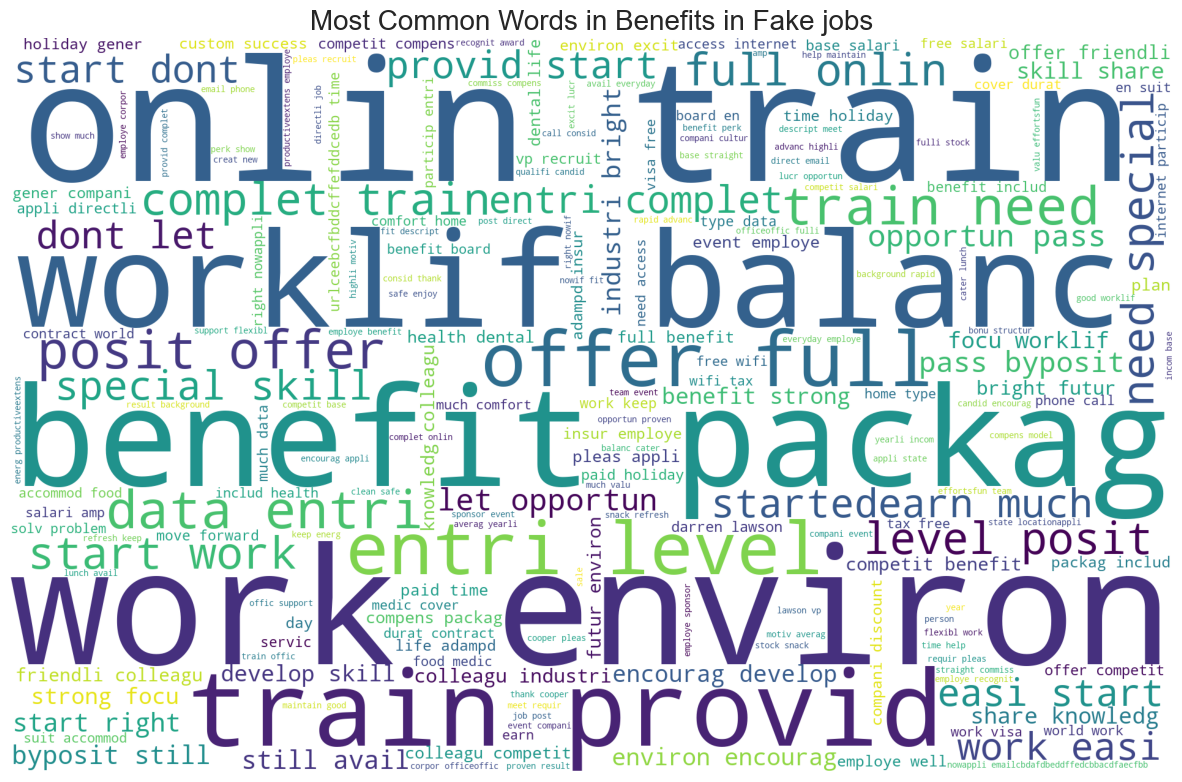

In [38]:
plt.figure(figsize=(15,10))
wordcloud_fraud_ben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_ben)

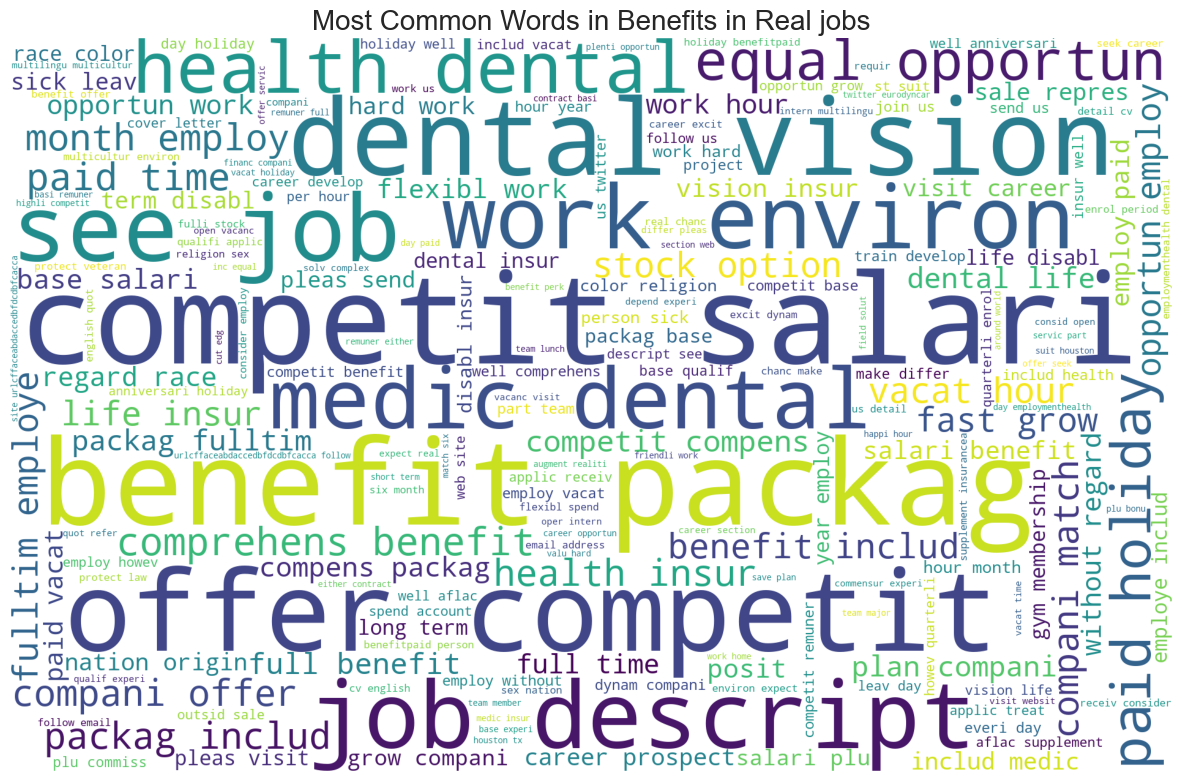

In [39]:
plt.figure(figsize=(15,10))
wordcloud_notfraudben=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_benefits_corpus)
plt.axis('off')
plt.title('Most Common Words in Benefits in Real jobs',size=20)
plt.imshow(wordcloud_notfraudben)

Text(0.5, 1.0, 'Real Benefits Lengths')

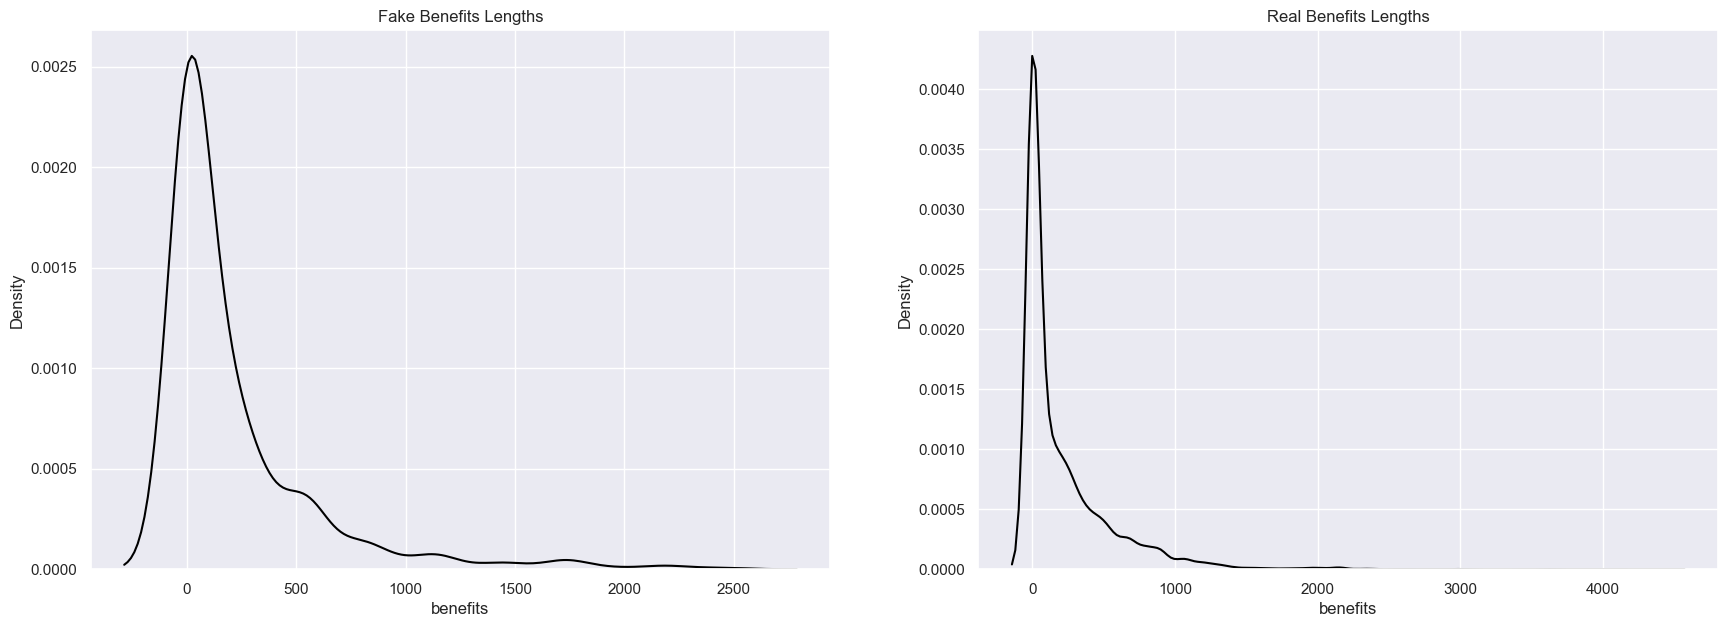

In [40]:
fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==1]['benefits'].str.len()
not_fraud_benefits_length=txt_cols[txt_cols["fraudulent"]==0]['benefits'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sb.kdeplot(fraud_benefits_length,ax=axes[0],color='black') 
sb.kdeplot(not_fraud_benefits_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Benefits Lengths',fontsize=12)
axes[1].set_title('Real Benefits Lengths',fontsize=12)

In [41]:
txt_fraud['company_profile']=txt_fraud['company_profile'].apply(column_clean)
txt_not_fraud['company_profile']=txt_not_fraud['company_profile'].apply(column_clean)

In [42]:
fraud_company = txt_fraud['company_profile'].apply(combine)
not_fraud_company = txt_not_fraud['company_profile'].apply(combine)

In [43]:
# To List

fraud_company_corpus=fraud_company.values.tolist()
not_fraud_company_corpus=not_fraud_company.values.tolist()

In [44]:
# Corpus for WordCloud
fraud_company_corpus=' '.join(fraud_company_corpus)
not_fraud_company_corpus=' '.join(not_fraud_company_corpus)

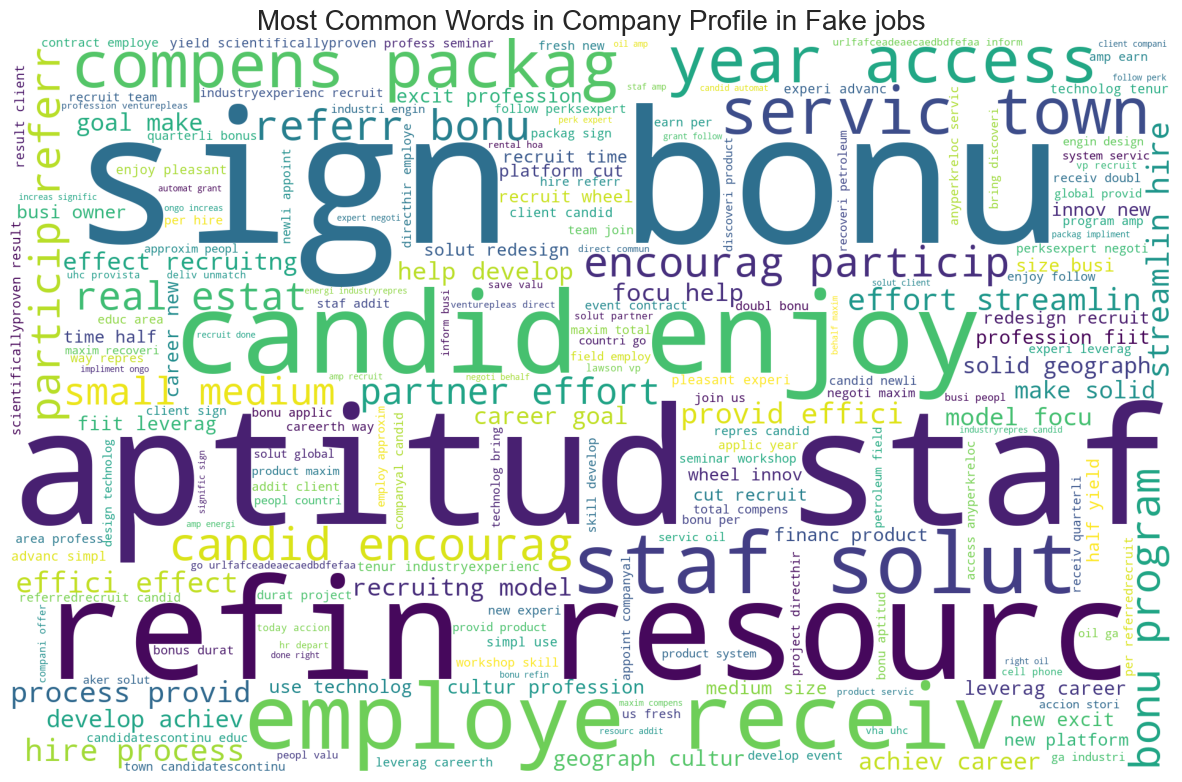

In [45]:
plt.figure(figsize=(15,10))
wordcloud_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_company)

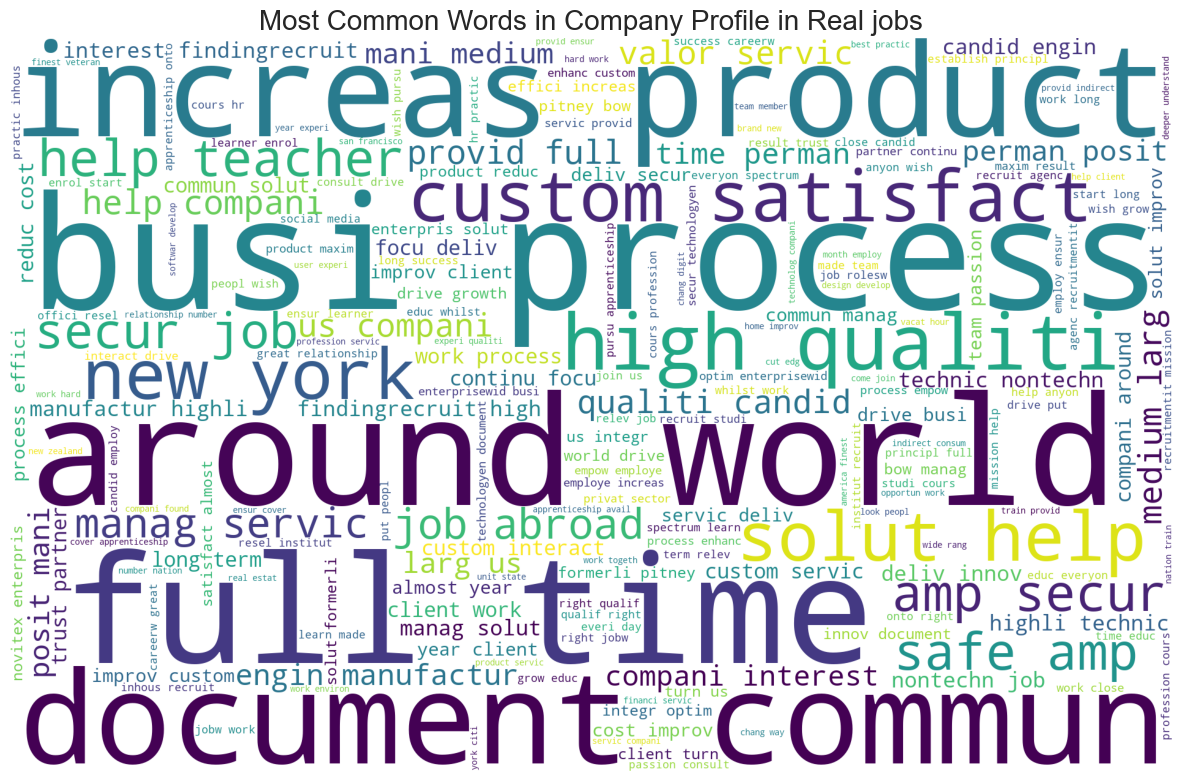

In [46]:
plt.figure(figsize=(15,10))
wordcloud_not_fraud_company=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_company_corpus)
plt.axis('off')
plt.title('Most Common Words in Company Profile in Real jobs',size=20)
plt.imshow(wordcloud_not_fraud_company)

Text(0.5, 1.0, 'Real Company Profile Lengths?')

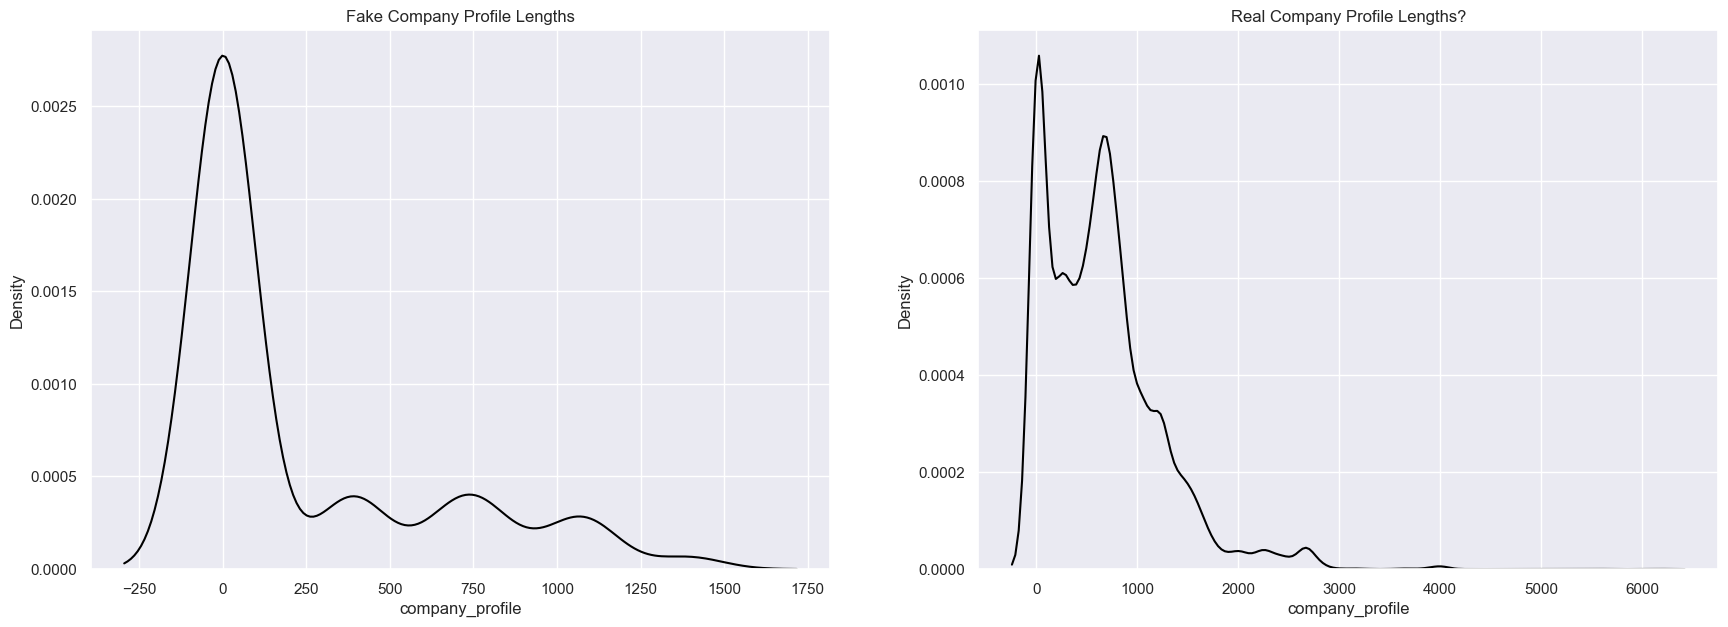

In [47]:
fraud_company_length=txt_cols[txt_cols["fraudulent"]==1]['company_profile'].str.len()
not_fraud_company_length=txt_cols[txt_cols["fraudulent"]==0]['company_profile'].str.len()

fig,axes=plt.subplots(1,2,figsize=(21,7))
sb.kdeplot(fraud_company_length,ax=axes[0],color='black') 
sb.kdeplot(not_fraud_company_length,ax=axes[1],color='black') 

axes[0].set_title('Fake Company Profile Lengths',fontsize=12)
axes[1].set_title('Real Company Profile Lengths?',fontsize=12)

In [48]:
txt_fraud['requirements']=txt_fraud['requirements'].apply(column_clean)
txt_not_fraud['requirements']=txt_not_fraud['requirements'].apply(column_clean)

In [49]:
fraud_requirements = txt_fraud['requirements'].apply(combine)
not_fraud_requirements = txt_not_fraud['requirements'].apply(combine)

In [50]:
# To List

fraud_requirements_corpus=fraud_requirements.values.tolist()
not_fraud_requirements_corpus=not_fraud_requirements.values.tolist()

In [51]:
# Corpus for WordCloud
fraud_requirements_corpus=' '.join(fraud_requirements_corpus)
not_fraud_requirements_corpus=' '.join(not_fraud_requirements_corpus)

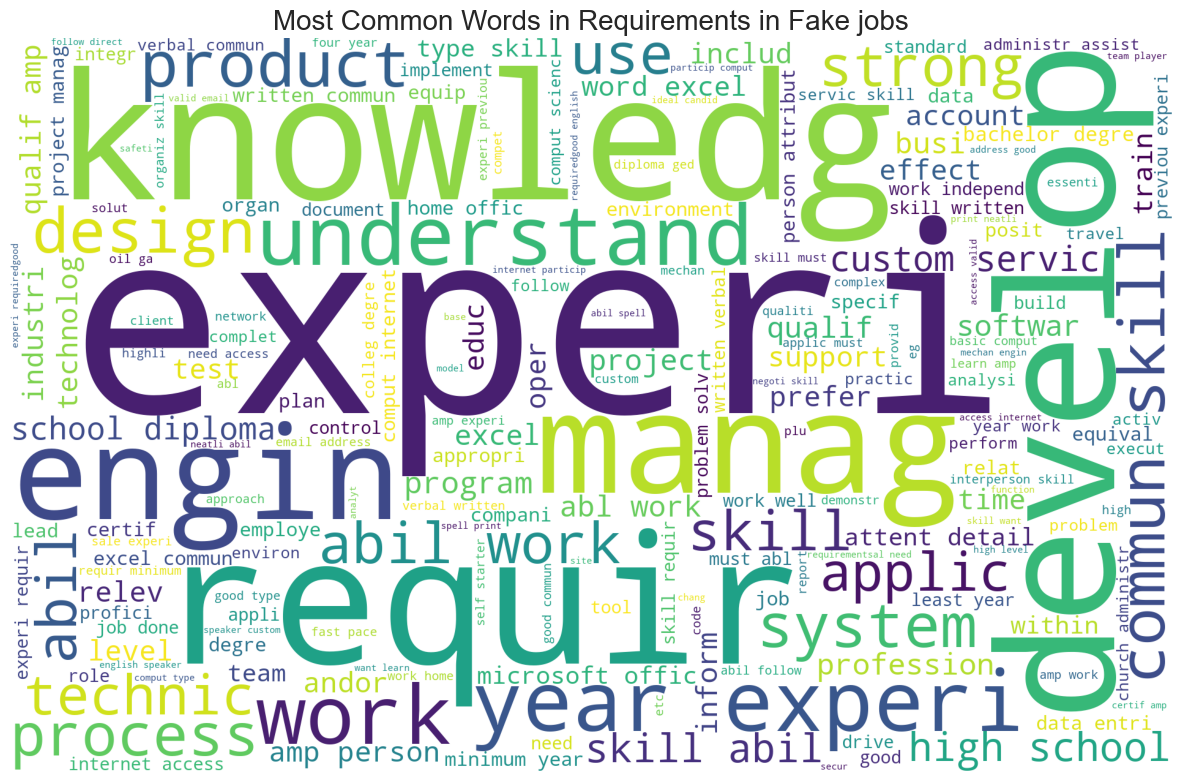

In [52]:
plt.figure(figsize=(15,10))
wordcloud_fraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Fake jobs',size=20)
plt.imshow(wordcloud_fraud_requirements)

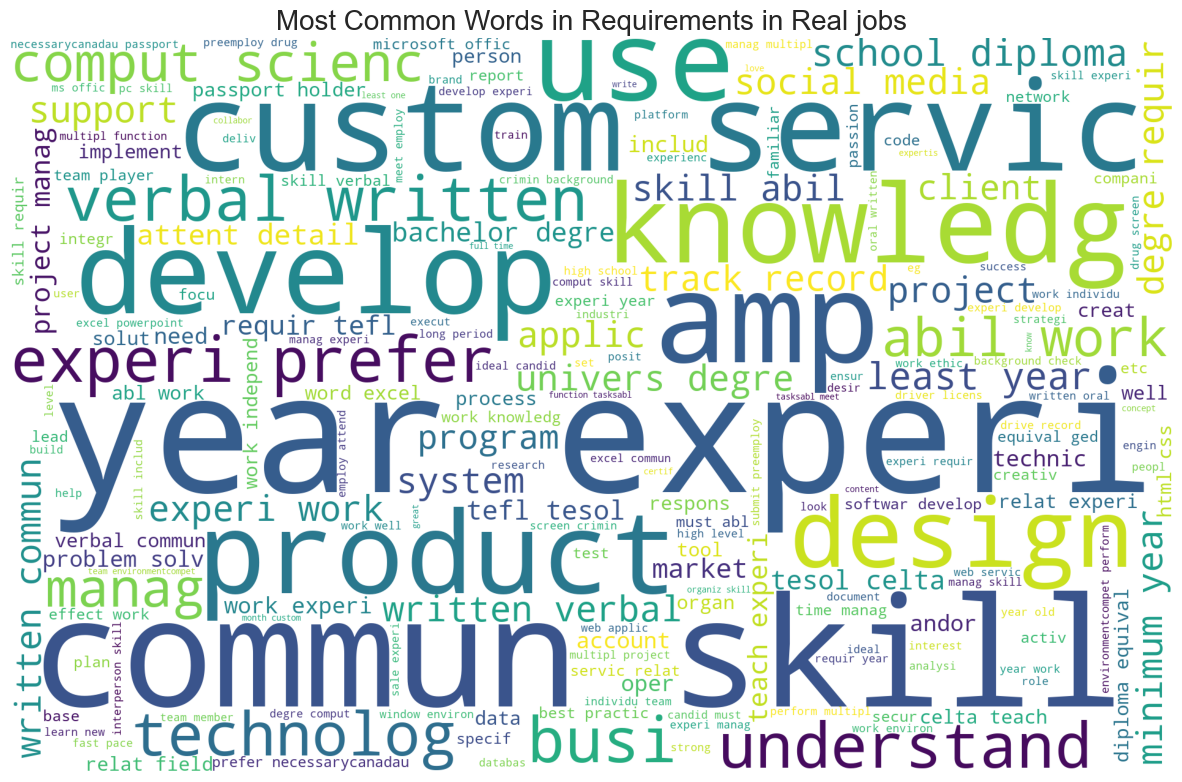

In [53]:
plt.figure(figsize=(15,10))
wordcloud_notfraud_requirements=WordCloud(width = 1900 , height = 1200,background_color='white').generate(not_fraud_requirements_corpus)
plt.axis('off')
plt.title('Most Common Words in Requirements in Real jobs',size=20)
plt.imshow(wordcloud_notfraud_requirements)

In [54]:
data=txt_cols.join(categ_cols.drop(columns='fraudulent'))

In [55]:
data['text']=data['title'] +' '+data['benefits']+' '+data['company_profile']+' '+data['description']+' '+data['requirements']
colm=['title','benefits','company_profile','description','requirements']
data.drop(columns=colm,inplace=True)

In [56]:
data['text']=data['text'].apply(column_clean)

In [57]:
data['text']=data['text'].apply(combine)

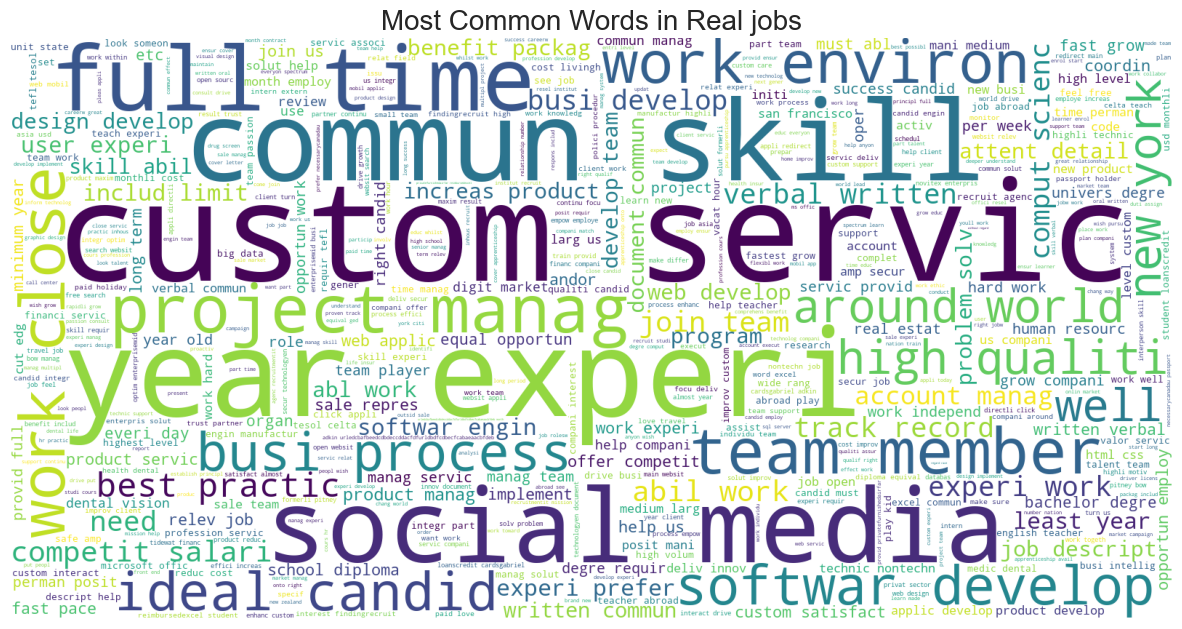

In [58]:
plt.figure(figsize = (15,10)) 
wordcloud_real = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 0]['text']))
plt.axis('off')
plt.title('Most Common Words in Real jobs',size=20)
plt.imshow(wordcloud_real)

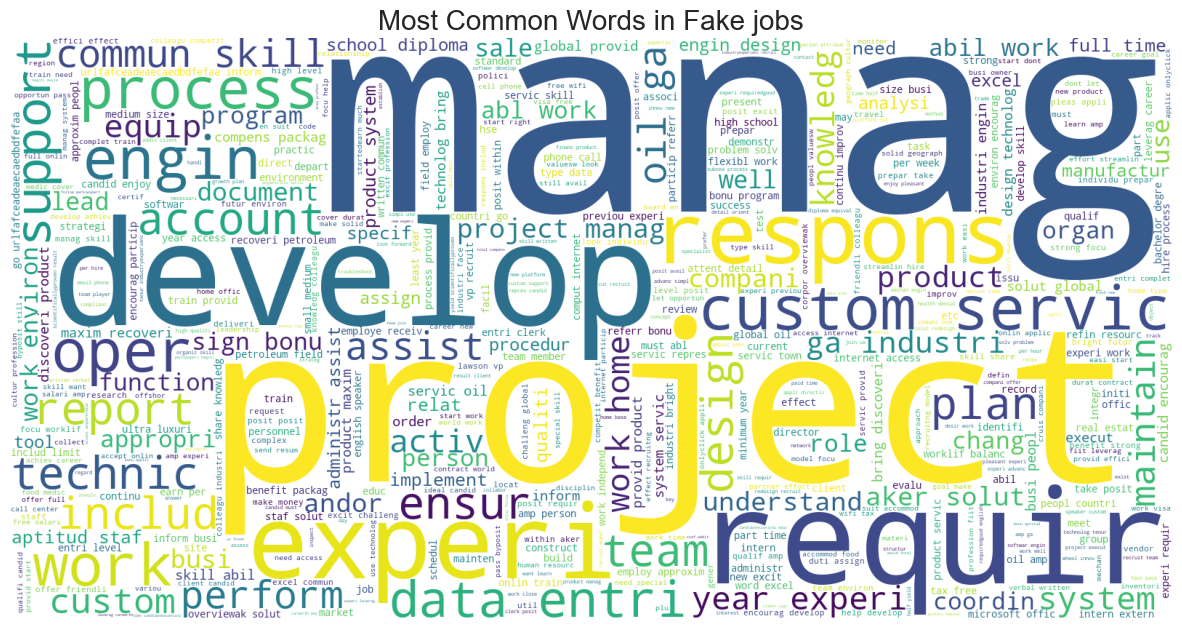

In [59]:
plt.figure(figsize = (15,10)) 
wordcloud_fake = WordCloud(width = 1600 , height = 800 , max_words = 500,background_color='white').generate(" ".join(data[data['fraudulent'] == 1]['text']))
plt.axis('off')
plt.title('Most Common Words in Fake jobs',size=20)
plt.imshow(wordcloud_fake)

In [60]:
x=data.drop(columns='fraudulent')
y=data['fraudulent']

In [61]:
# Applying Count Vectorizer
count_vec = CountVectorizer(max_features=5000)
vec = count_vec.fit_transform(data['text'])

In [62]:
text=pd.DataFrame(vec.toarray(),columns=count_vec.get_feature_names_out())

In [63]:
labels=pd.get_dummies(x.drop(columns='text'))
result = pd.concat([labels, text], axis=1)

In [64]:
# Splitting data to train and test
x_train,x_test,y_train,y_test=train_test_split(result,y,test_size=0.2,random_state=42,stratify=y)

# Modelling

Making Use of Decision tree algorithm


In [83]:
# DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt_y_pred=dt.predict(x_test)

In [85]:
print('        Training Classification report for Decision Tree Classifier \n',classification_report(y_train,dt.predict(x_train)))
print('        Testing Classification Report for Decision Tree Classifier \n',classification_report(y_test,dt_y_pred))


        Training Classification report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Decision Tree Classifier 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      3403
           1       0.83      0.77      0.80       173

    accuracy                           0.98      3576
   macro avg       0.91      0.88      0.89      3576
weighted avg       0.98      0.98      0.98      3576



Confusion Matrix for Training Decision Tree Classifier
True Positives (TP): 693
False Positives (FP): 0
True Negatives (TN): 13611
False Negatives (FN): 0

Confusion Matrix for Testing Decision Tree Classifier
True Positives (TP): 132
False Positives (FP): 35
True Negatives (TN): 3368
False Negatives (FN): 41



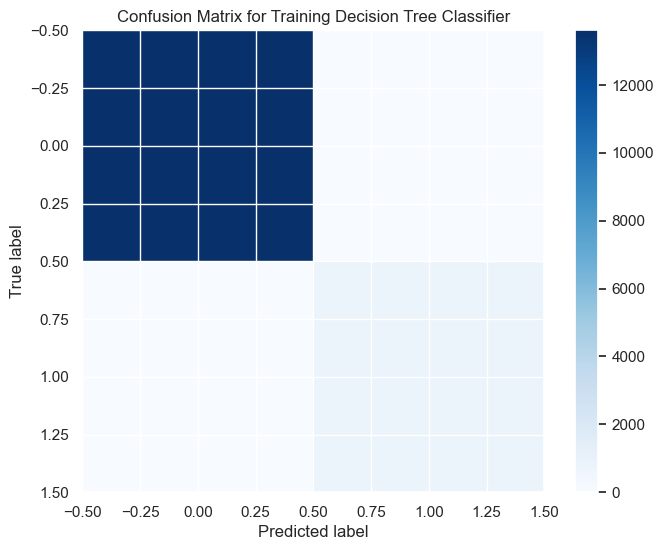

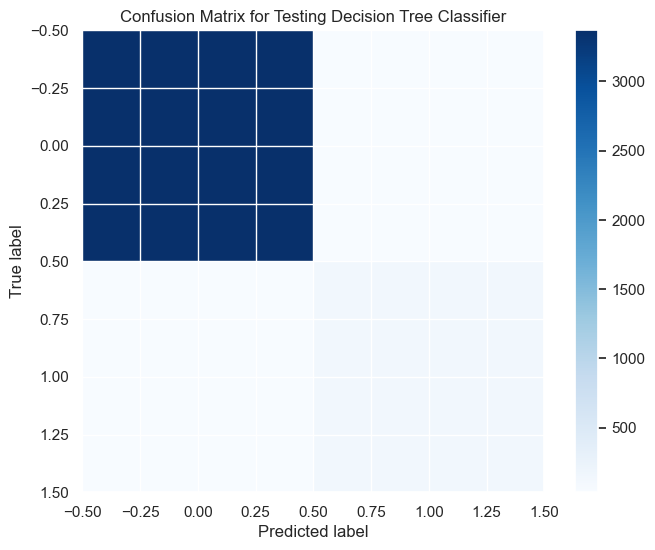

In [88]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Fit the Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

# Get predictions for test data
dt_y_pred = dt.predict(x_test)

# Get confusion matrix for training data
cm_train_dt = confusion_matrix(y_train, dt.predict(x_train))

# Get confusion matrix for testing data
cm_test_dt = confusion_matrix(y_test, dt_y_pred)

# Define a function to print confusion matrix values
def print_confusion_matrix(cm, title):
    print(title)
    print("True Positives (TP):", cm[1, 1])
    print("False Positives (FP):", cm[0, 1])
    print("True Negatives (TN):", cm[0, 0])
    print("False Negatives (FN):", cm[1, 0])
    print()

# Print confusion matrix values for training data
print_confusion_matrix(cm_train_dt, "Confusion Matrix for Training Decision Tree Classifier")
# Print confusion matrix values for testing data
print_confusion_matrix(cm_test_dt, "Confusion Matrix for Testing Decision Tree Classifier")

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
plt.imshow(cm_train_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Decision Tree Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
plt.imshow(cm_test_dt, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Decision Tree Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


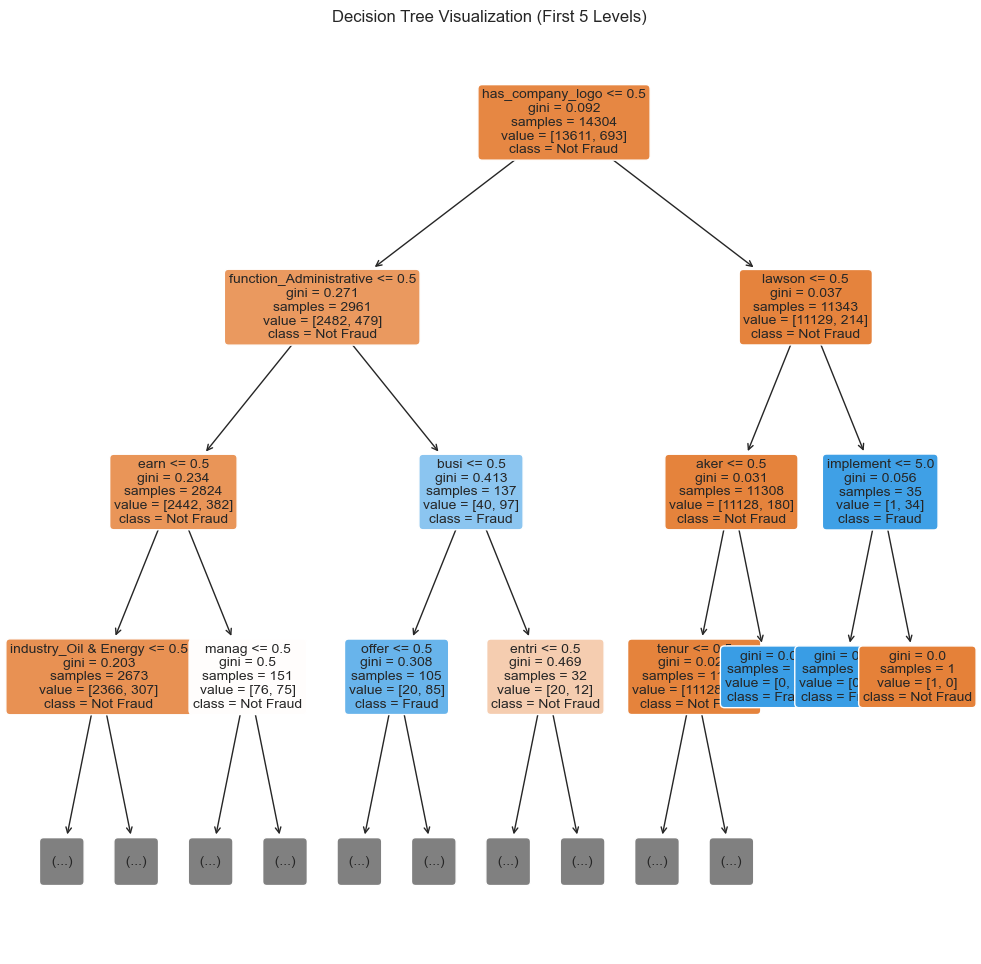

In [116]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert index object to list
feature_names = list(x_train.columns)

plt.figure(figsize=(12,12))
plot_tree(dt, max_depth=3, filled=True, feature_names=feature_names, class_names=['Not Fraud', 'Fraud'], rounded=True, fontsize=10)
plt.title('Decision Tree Visualization (First 5 Levels)')
plt.show()



Making Use of Random forest algorithm

In [77]:
# Random Forest
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_y_pred=rf.predict(x_test)
!pip install --upgrade scikit-learn


In [79]:


print('        Training Classification report for Random Forest Classifier \n',classification_report(y_train,rf.predict(x_train)))
print('        Testing Classification Report for Random Forest Classifier \n',classification_report(y_test,rf_y_pred))



        Training Classification report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      1.00      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Random Forest Classifier 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3403
           1       1.00      0.59      0.74       173

    accuracy                           0.98      3576
   macro avg       0.99      0.79      0.87      3576
weighted avg       0.98      0.98      0.98      3576



Confusion Matrix for Training Random Forest Classifier
True Positives (TP): 693
False Positives (FP): 0
True Negatives (TN): 13611
False Negatives (FN): 0

Confusion Matrix for Testing Random Forest Classifier
True Positives (TP): 102
False Positives (FP): 0
True Negatives (TN): 3403
False Negatives (FN): 71



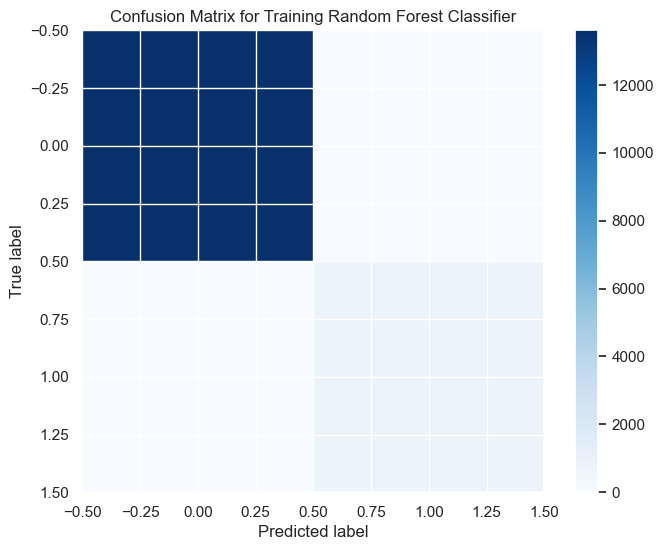

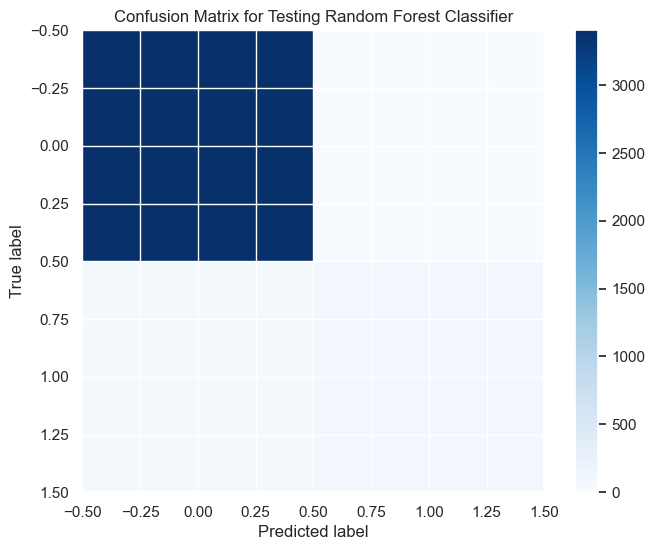

In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Get confusion matrix for training data
cm_train = confusion_matrix(y_train, rf.predict(x_train))


# Get confusion matrix for testing data
cm_test = confusion_matrix(y_test, rf.predict(x_test))

# Define a function to print confusion matrix values
def print_confusion_matrix(cm, title):
    print(title)
    print("True Positives (TP):", cm[1, 1])
    print("False Positives (FP):", cm[0, 1])
    print("True Negatives (TN):", cm[0, 0])
    print("False Negatives (FN):", cm[1, 0])
    print()

# Print confusion matrix values for training data
print_confusion_matrix(cm_train, "Confusion Matrix for Training Random Forest Classifier")
# Print confusion matrix values for testing data
print_confusion_matrix(cm_test, "Confusion Matrix for Testing Random Forest Classifier")

# Plot confusion matrix for training data
plt.figure(figsize=(8, 6))
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Training Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
plt.imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Testing Random Forest Classifier')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [93]:
# Logistic Regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_y_pred=lr.predict(x_test)

In [94]:
print('        Training Classification report for Logistic Regression \n',classification_report(y_train,lr.predict(x_train)))
print('        Testing Classification Report for Logistion Regression \n',classification_report(y_test,lr_y_pred))

        Training Classification report for Logistic Regression 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     13611
           1       1.00      0.99      1.00       693

    accuracy                           1.00     14304
   macro avg       1.00      1.00      1.00     14304
weighted avg       1.00      1.00      1.00     14304

        Testing Classification Report for Logistion Regression 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3403
           1       0.90      0.80      0.85       173

    accuracy                           0.99      3576
   macro avg       0.95      0.90      0.92      3576
weighted avg       0.99      0.99      0.99      3576



Confusion Matrix for Logistic Regression - Train Data
True Positives (TP): 688
False Positives (FP): 0
True Negatives (TN): 13611
False Negatives (FN): 5

Confusion Matrix for Logistic Regression - Test Data
True Positives (TP): 138
False Positives (FP): 15
True Negatives (TN): 3388
False Negatives (FN): 35



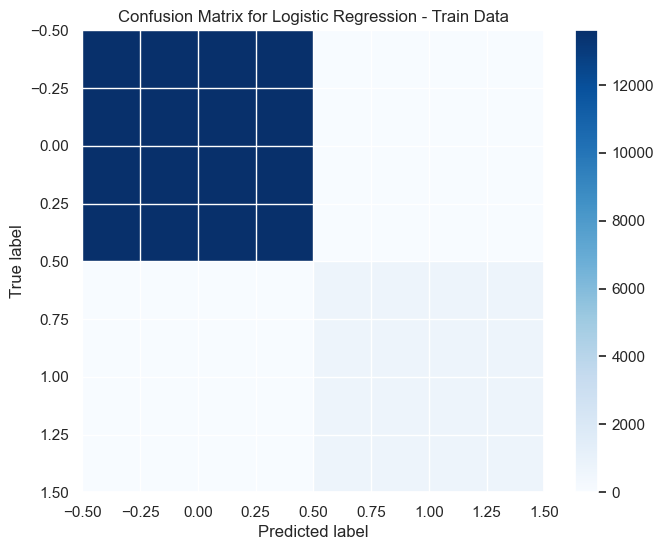

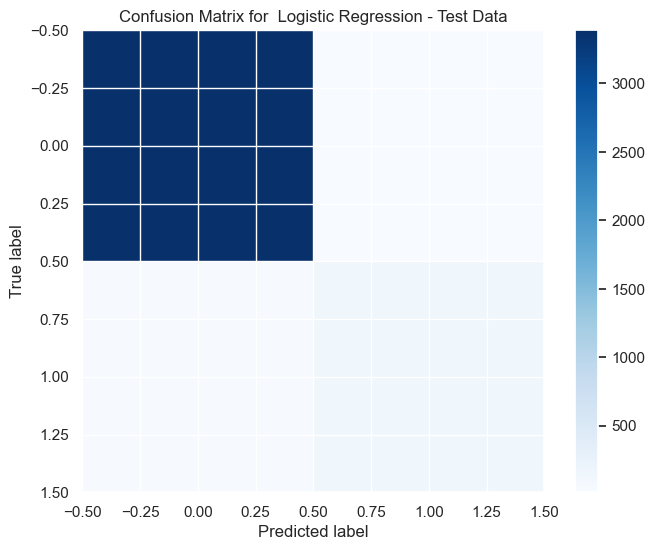

In [99]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Predictions on train data
lr_train_pred = lr.predict(x_train)

# Predictions on test data
lr_test_pred = lr.predict(x_test)

# Confusion matrix for train data
cm_lr_train = confusion_matrix(y_train, lr_train_pred)

# Confusion matrix for test data
cm_lr_test = confusion_matrix(y_test, lr_test_pred)

# Define a function to print confusion matrix values
def print_confusion_matrix(cm, title):
    print(title)
    print("True Positives (TP):", cm[1, 1])
    print("False Positives (FP):", cm[0, 1])
    print("True Negatives (TN):", cm[0, 0])
    print("False Negatives (FN):", cm[1, 0])
    print()

# Print confusion matrix values for logistic regression - train data
print_confusion_matrix(cm_lr_train, "Confusion Matrix for Logistic Regression - Train Data")

# Print confusion matrix values for logistic regression - test data
print_confusion_matrix(cm_lr_test, "Confusion Matrix for Logistic Regression - Test Data")

# Plot confusion matrix for train data
plt.figure(figsize=(8, 6))
plt.imshow(cm_lr_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression - Train Data')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(8, 6))
plt.imshow(cm_lr_test, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for  Logistic Regression - Test Data')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
